In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = sns.load_dataset('anscombe')

In [3]:
X = df.drop(['dataset','y'], axis=1)
y = df.y

In [4]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

<Axes: xlabel='x', ylabel='y'>

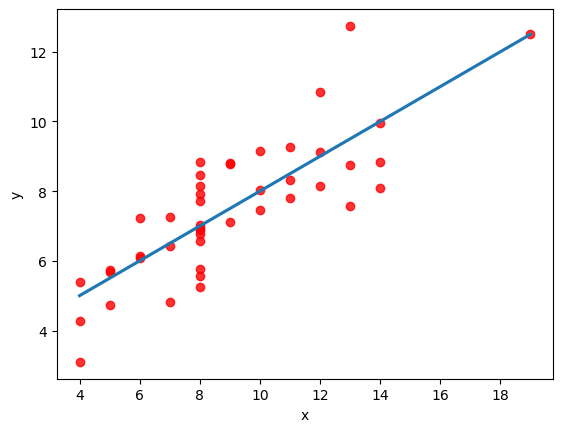

In [5]:
sns.regplot(df, x='x', y='y', ci=False, scatter_kws={'color':'red'})

In [6]:
#y^ predicted value
yhat = lr.predict(X)
resid = yhat - y #distances from our predicted line

<Axes: ylabel='y'>

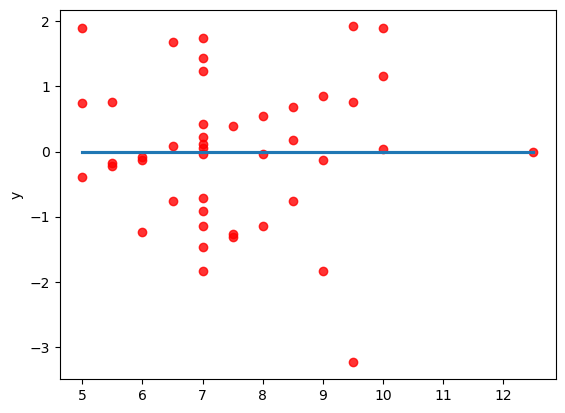

In [7]:
sns.regplot(x=yhat, y=resid, ci=False, scatter_kws={'color':'Red'})

In [8]:
df = sns.load_dataset('diamonds')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
X6  = df.drop(['cut','clarity','color','price'], axis=1)
X1 = df[['carat']]
y = df.price

In [10]:
mr1 = LinearRegression()
mr1.fit(X1, y)

LinearRegression()

In [11]:
yHat = mr1.predict(X1)

[Text(0.5, 0, 'Predicted Price'), Text(0, 0.5, 'Residal')]

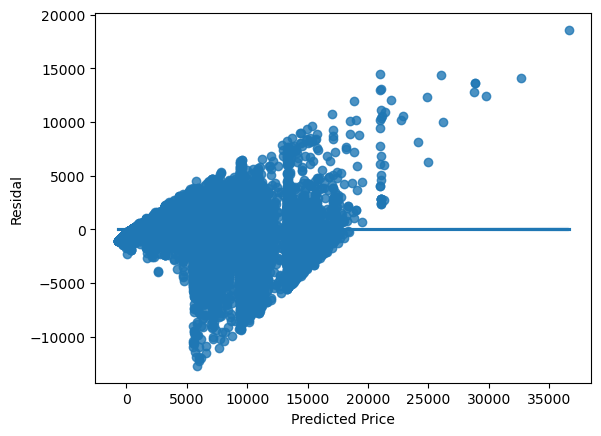

In [12]:
sns.regplot(x=yHat, y = (yHat-y)).set(xlabel='Predicted Price', ylabel='Residal')

In [13]:
mr1.score(X1, y) #R^2 a proxy for accuracy or how good your model is

0.8493305264354858

In [14]:
mr6 = LinearRegression()
mr6.fit(X6, y)

LinearRegression()

<Axes: ylabel='price'>

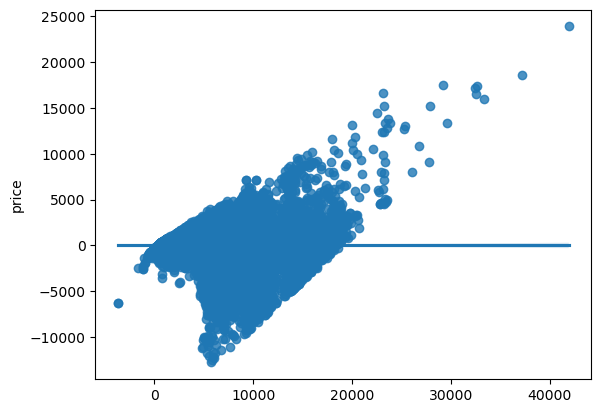

In [23]:
yhat6 = mr6.predict(X6)
sns.regplot(x=yhat6, y=(yhat6-y))

In [16]:
mr6.score(X6, y)

0.8592186831580985

In [17]:
pf2 = PolynomialFeatures(degree=2)
X6d2 = pf2.fit_transform(X6)

In [18]:
X6.shape, X6d2.shape

((53940, 6), (53940, 28))

In [19]:
mr6d2 = LinearRegression()
mr6d2.fit(X6d2, y)

LinearRegression()

In [20]:
mr6d2.score(X6d2, y)

0.8762539042488757

[Text(0.5, 0, 'Predicted Price'), Text(0, 0.5, 'Residal')]

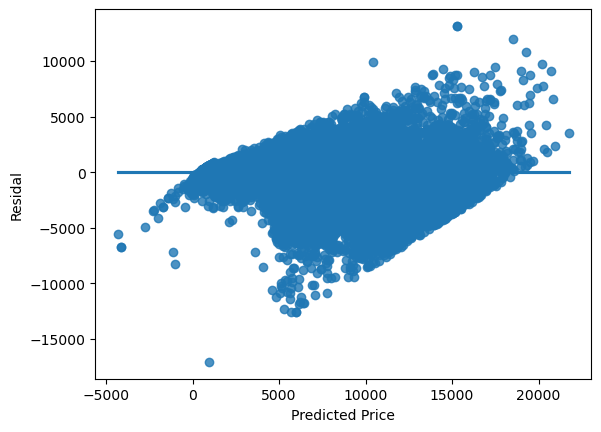

In [21]:
yd2Hat = mr6d2.predict(X6d2)
sns.regplot(x=yd2Hat, y = (yd2Hat-y)).set(xlabel='Predicted Price', ylabel='Residal')